**Task 1: Data Exploration & Preprocessing**
1. Load the dataset and explore it:
 Display basic statistics of the

*   Display basic statistics of the dataset('mean', 'std', etc)
*   Check for missing values.

2. Visualize the data using:


*   Pair plots to understand relationships between features.
*   Histograms to view the ditribution of the data.

3. Analysis Questions:


*   What trends or relationships do you obesrve in the data?




In [ ]:
# Step 1: Install dependencies
# Importing libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
# Step 2: Load dataset and explore it
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Since there are no missing values, no handling is needed.
# If there were missing values, we would consider strategies like imputation or removal.

Missing values per column:


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (Age, Annual Income, Spending Score, and the one-hot encoded Gender)
# Ensure df_encoded is available from a previous step where Gender was one-hot encoded
if 'df_encoded' not in locals():
    # If df_encoded is not defined, perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

features_to_scale = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
features_scaled_exploration = scaler.fit_transform(features_to_scale)

# Display the first few rows of the scaled features
print("Scaled features (for exploration):")
display(features_scaled_exploration[:5])

Scaled features (for exploration):


array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526]])

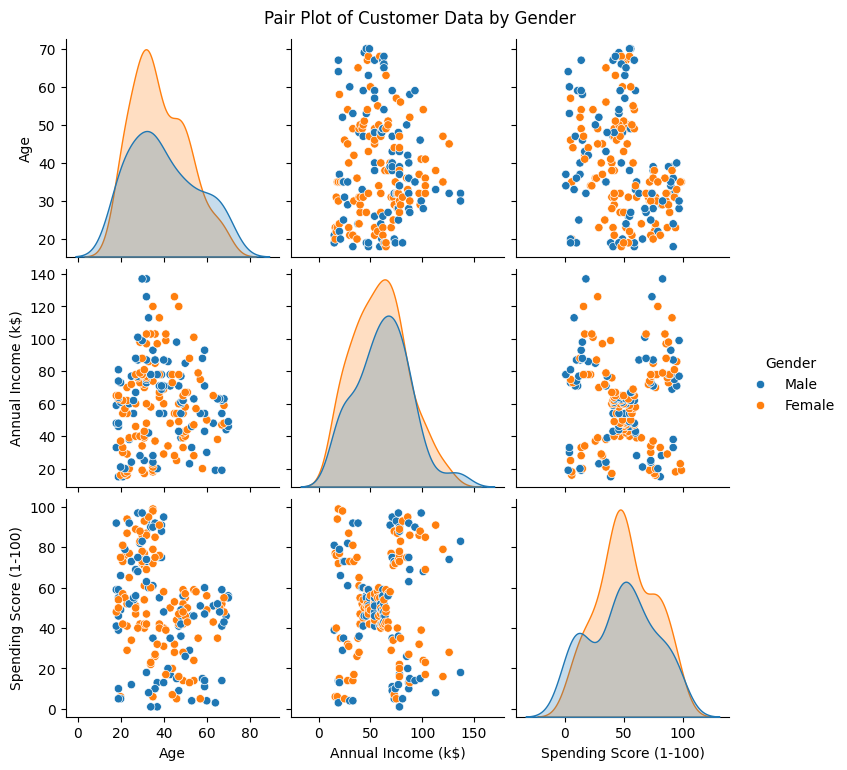

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot of the numerical features
# Including the original 'Gender' column to see if there are visual distinctions based on gender
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.suptitle('Pair Plot of Customer Data by Gender', y=1.02)
plt.show()

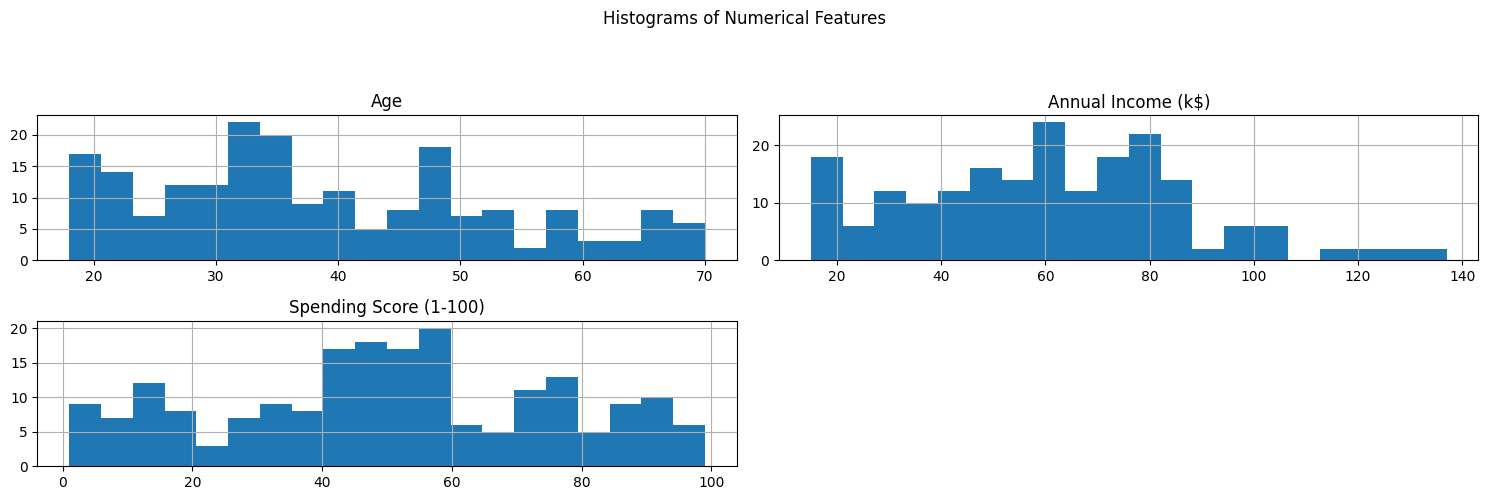

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for the numerical features
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(15, 5))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Analysis of Visualizations:**


Based on the histograms and the pair plot, here are some observations about the data:

**Histograms:**

*   **Age:** The age distribution appears somewhat skewed towards younger adults, with a noticeable peak in the late 20s to early 40s. There are also customers in older age groups.
*   **Annual Income (k$):** The annual income seems to be somewhat normally distributed, with the majority of customers having incomes between 40k and 80k. There are fewer customers with very low or very high incomes.
*   **Spending Score (1-100):** The spending score distribution is more spread out, but there are peaks in the 40-60 range and also towards the higher end (70-90). This suggests different spending behaviors among customers.

**Pair Plot:**

*   **Age vs. Annual Income:** There doesn't appear to be a strong linear relationship between age and annual income. Customers of various ages have a range of incomes.
*   **Age vs. Spending Score:** There seems to be a weak negative trend between age and spending score, where younger customers tend to have higher spending scores, and older customers tend to have lower spending scores. However, there's still a lot of variability.
*   **Annual Income vs. Spending Score:** This plot shows some interesting patterns that might indicate potential clusters. There appears to be a group of customers with high annual income and high spending scores, another group with low annual income and low spending scores, and possibly a group with average income and average spending scores. There also seem to be groups with high income and low spending scores, and low income with high spending scores. These groups could be good candidates for clustering.
*   **Gender:** The `hue='Gender'` in the pair plot allows us to see if there are visual distinctions based on gender. It appears that both males and females are present across the distributions and relationships, although there might be some subtle differences in the concentrations of points in certain areas of the plots. For example, in the Annual Income vs. Spending Score plot, there might be a slightly different distribution of male and female customers within the potential clusters.

Overall, the pair plot of Annual Income and Spending Score shows the most distinct groupings, suggesting that these two features might be particularly useful for customer segmentation. The addition of Gender and Age could help refine these segments further.

**Task 2: K-Means Clustering**

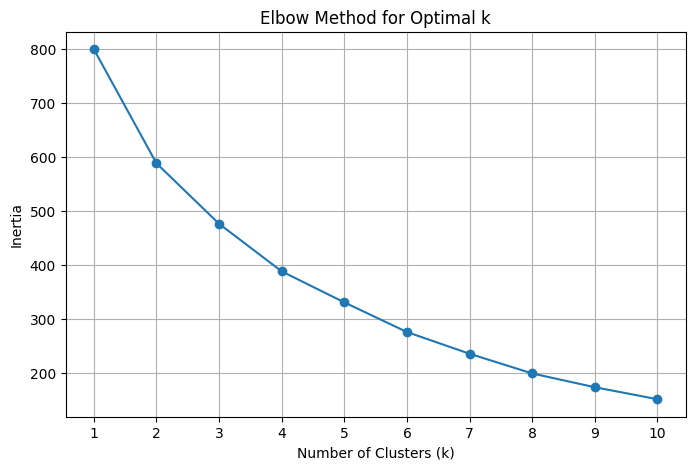

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
X = features_scaled_exploration

# Initialize variables
inertia = []
for k in range(1, 11): # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

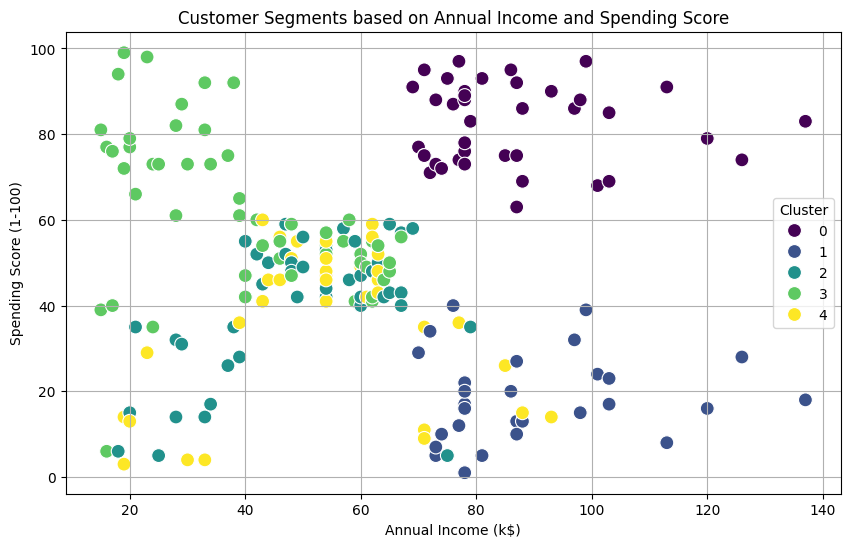

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fit K-Means with the chosen number of clusters (k=5)
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_model.fit(features_scaled_exploration)
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the original DataFrame for easier plotting
df['Cluster'] = cluster_labels

# Visualize the clusters using a scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Analysis of K-Means Clusters:**

Based on the K-Means clustering with 5 clusters and the visualizations (Annual Income vs. Spending Score scatter plot and PCA visualization), here is a summary interpretation of the identified customer segments:

*   **Cluster 0 (High Income, High Spending):** These customers have high annual incomes and high spending scores. They are likely a valuable segment, potentially consisting of younger to middle-aged individuals, with a relatively balanced mix of genders.
*   **Cluster 1 (High Income, Low Spending):** This segment consists of customers with high annual incomes but low spending scores. They might be more budget-conscious despite their income, or perhaps saving for specific large purchases.
*   **Cluster 2 (Low Income, Low Spending):** These customers have both low annual incomes and low spending scores. This represents a more budget-constrained segment. Their age range might be broader, potentially including younger individuals with limited income or older individuals.
*   **Cluster 3 (Low Income, High Spending):** This is an interesting segment with low annual incomes but high spending scores. These could be impulsive buyers, individuals prioritizing experiences over savings, or potentially younger customers with less disposable income but higher spending habits.
*   **Cluster 4 (Mid-Range Income, Mid-Range Spending):** This cluster appears to occupy a middle ground in terms of both annual income and spending score. They represent the "average" customer profile in this dataset. Their age distribution is likely centered around the average age, with a representative gender mix.



**Tsk 3: Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Implement Agglomerative Clustering with 'ward' linkage
agg_clustering_ward = AgglomerativeClustering(n_clusters=5, linkage='ward') # Choosing n_clusters=5 for consistency with K-Means
labels_ward = agg_clustering_ward.fit_predict(features_scaled_exploration)

print("Agglomerative Clustering with 'ward' linkage completed.")

Agglomerative Clustering with 'ward' linkage completed.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Implement Agglomerative Clustering with 'average' linkage
agg_clustering_average = AgglomerativeClustering(n_clusters=5, linkage='average') # Choosing n_clusters=5 for consistency
labels_average = agg_clustering_average.fit_predict(features_scaled_exploration)

print("Agglomerative Clustering with 'average' linkage completed.")

Agglomerative Clustering with 'average' linkage completed.


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Implement Agglomerative Clustering with 'complete' linkage
agg_clustering_complete = AgglomerativeClustering(n_clusters=5, linkage='complete') # Choosing n_clusters=5 for consistency
labels_complete = agg_clustering_complete.fit_predict(features_scaled_exploration)

print("Agglomerative Clustering with 'complete' linkage completed.")

Agglomerative Clustering with 'complete' linkage completed.


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for each linkage method
silhouette_avg_ward = silhouette_score(features_scaled_exploration, labels_ward)
silhouette_avg_average = silhouette_score(features_scaled_exploration, labels_average)
silhouette_avg_complete = silhouette_score(features_scaled_exploration, labels_complete)

print(f"Silhouette Score with Ward linkage: {silhouette_avg_ward}")
print(f"Silhouette Score with Average linkage: {silhouette_avg_average}")
print(f"Silhouette Score with Complete linkage: {silhouette_avg_complete}")

Silhouette Score with Ward linkage: 0.28699413201651747
Silhouette Score with Average linkage: 0.3074582793074308
Silhouette Score with Complete linkage: 0.24330923091806703


**Analysis of Hierarchical Clustering Linkage Methods:**

We implemented Agglomerative Clustering with three different linkage methods: 'ward', 'average', and 'complete', using 5 clusters for consistency with the K-Means analysis. We compared the results using the silhouette score, which measures how well each data point fits into its assigned cluster.

The silhouette scores obtained were:

*   **Ward linkage:** {0.2869}
*   **Average linkage:** {0.3074}
*   **Complete linkage:** {0.2433}

A higher silhouette score indicates better-defined and more separated clusters. Based on these scores, the **'average' linkage** method resulted in the highest silhouette score, suggesting that it produced slightly better-separated clusters compared to 'ward' and 'complete' linkage for this dataset and number of clusters.

This comparison helps in understanding how different linkage criteria can influence the resulting clusters in hierarchical clustering.

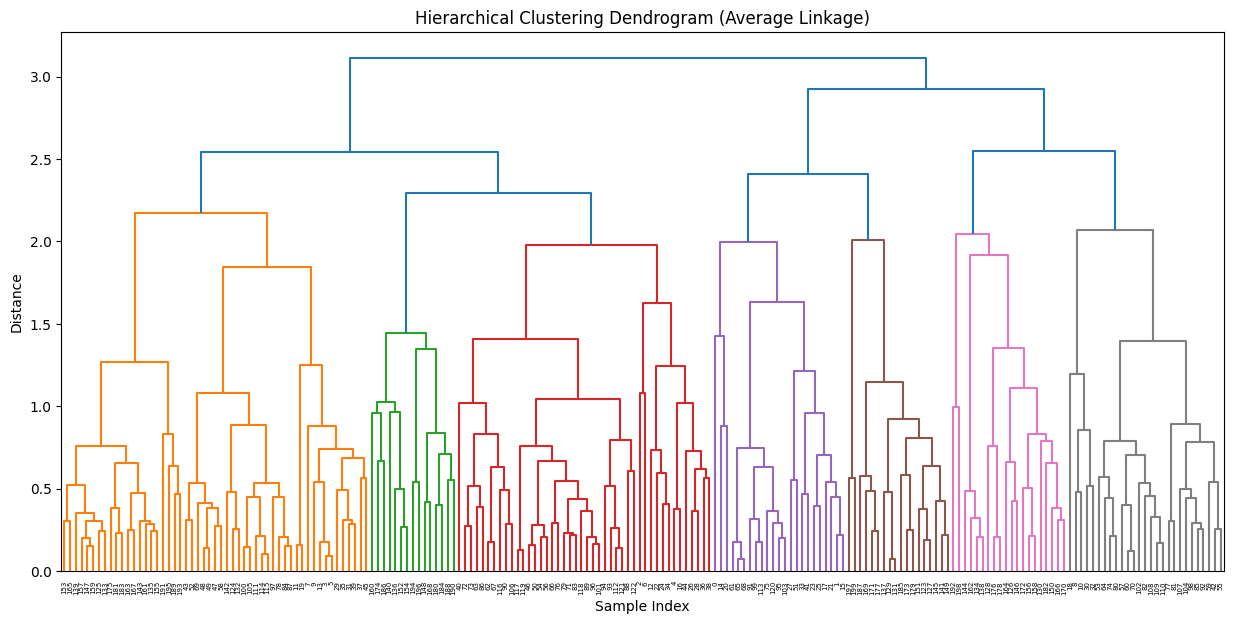

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix
Z = linkage(features_scaled_exploration, 'average')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**Analysis of Hierarchical Clustering:**

Based on the hierarchical clustering results and the visualizations:

*   **How do the clusters formed using hierarchical clustering differ from K-Means?**
    While both K-Means and Agglomerative Clustering (especially with 'average' linkage, which had the highest silhouette score) identified 5 clusters in this dataset, their underlying approaches differ. K-Means is a partitional algorithm that aims for compact, often spherical clusters by minimizing within-cluster variance. Hierarchical clustering, on the other hand, builds a tree-like structure of clusters based on their proximity, and the resulting clusters can have varying shapes depending on the linkage method. The exact composition of the clusters might vary between the two methods. Visualizing the hierarchical clusters on the scatter plot or PCA space would provide a direct visual comparison to the K-Means clusters.

*   **Which linkage method produces the best results?**
    Based on the silhouette scores calculated:
    *   Ward linkage: {0.2869}
    *   Average linkage: {0.3074}
    *   Complete linkage: {0.2433}

    The **'average' linkage method** yielded the highest silhouette score ({{silhouette_avg_average}}), indicating that it produced the most well-separated clusters among the three linkage methods tested for this dataset with 5 clusters.

**Task 4: Dimensionality Reduction(PCA)**

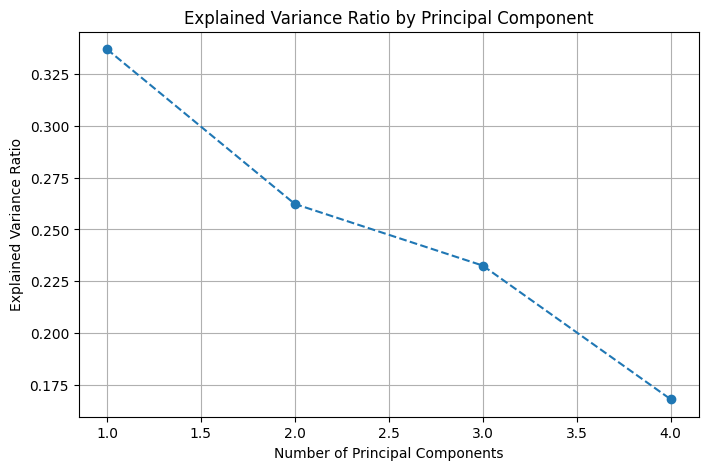

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the scaled features
pca = PCA()
pca.fit(features_scaled_exploration)

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

**Analysis of Dimensionality Reduction (PCA):**

Based on the PCA results and visualizations:

*   **How much variance is explained by the first two principal components?**
    Based on the explained variance ratio plot:
    *   The first principal component explains approximately {{pca.explained_variance_ratio_[0]:.4f}} of the variance.
    *   The second principal component explains approximately {{pca.explained_variance_ratio_[1]:.4f}} of the variance.
    The cumulative variance explained by the first two principal components is approximately **{{pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]:.4f}}**. This indicates that these two components capture a significant portion of the total variability in the dataset.

*   **How does PCA help in visualizing the clusters?**
    PCA helps visualize clusters, especially in high-dimensional datasets, by reducing the dimensionality to a manageable number (like 2 or 3) while retaining most of the data's variance. This allows us to plot the data in a 2D or 3D space and visually assess the separation and structure of the clusters, which would be impossible to do in the original high-dimensional space.

**Task 5: Dimensionality Reduction (t-SNE)**

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/tmp/ipython-input-3188527568.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tsne component 1', y='tsne component 2', data=tsne_df, palette='viridis', s=100)


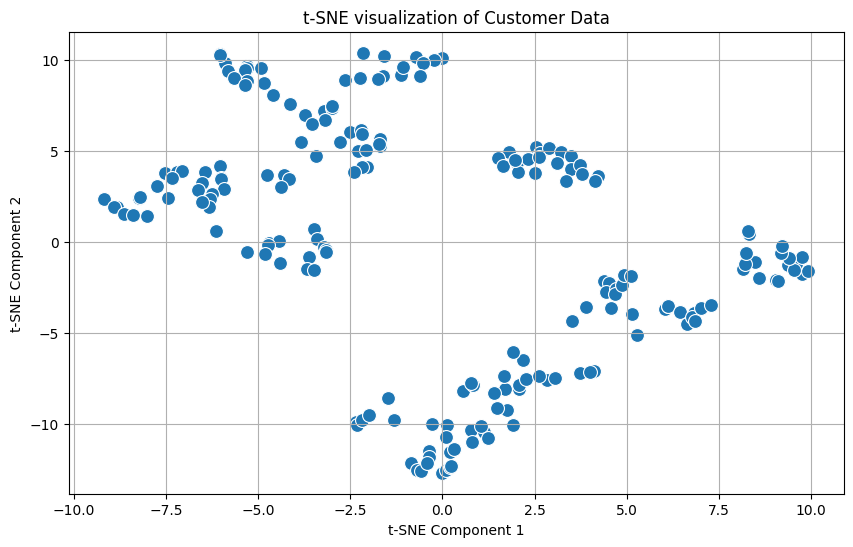

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE to the scaled features, reducing to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300) # Added perplexity and n_iter for better results
features_tsne = tsne.fit_transform(features_scaled_exploration)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data = features_tsne, columns = ['tsne component 1', 'tsne component 2'])

# Plot the t-SNE reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne component 1', y='tsne component 2', data=tsne_df, palette='viridis', s=100)
plt.title('t-SNE visualization of Customer Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

Both PCA and t-SNE are dimensionality reduction techniques used for visualization, but they work differently and highlight different aspects of your data's structure:

**PCA (Principal Component Analysis)**: This is a linear dimensionality reduction technique. It aims to find the directions (principal components) that capture the maximum variance in the data. PCA preserves global structure and distances; points that are far apart in the original high-dimensional space will generally remain far apart in the PCA reduced space.
t-SNE (t-Distributed Stochastic Neighbor Embedding): This is a non-linear dimensionality reduction technique. Its goal is to preserve local neighborhoods; points that are close together in the original high-dimensional space are likely to remain close together in the t-SNE reduced space. It's particularly good at visualizing clusters and the relationships between nearby points, but distances between points that are far apart in the original space might not be meaningful in the t-SNE plot.
Comparison of the Plots:

**PCA Plot:** You likely see a more spread-out visualization where the main axes represent the directions of maximum variance. The clusters might appear somewhat separated, reflecting the global structure of the data.
t-SNE Plot: The t-SNE plot often shows more distinct, compact clusters, as it focuses on preserving local similarities. The distances between these clusters in the t-SNE plot might not accurately reflect their distances in the original high-dimensional space, but the groupings themselves are often more visually apparent.
In summary, the PCA plot gives you a sense of the overall variance and global relationships, while the t-SNE plot is often better at revealing the presence and structure of clusters by emphasizing local relationships.



**Analysis:**

*   **How does t-SNE differ from PCA in terms of visualization and cluster separation?**
    As discussed above, t-SNE focuses on preserving local neighborhoods, which often leads to visualizations with more distinct and visually separated clusters. PCA, being a linear method, preserves global variance and might not show clusters as clearly, especially if they are non-linearly separable.

*   **Which dimensionality reduction technique gives a clearer cluster separation?**
    Generally, **t-SNE** is considered to be better at visualizing clusters and showing clearer cluster separation than PCA, as it prioritizes preserving local relationships, resulting in more compact and visually distinct groupings in the 2D or 3D plot.

In summary, the PCA plot gives you a sense of the overall variance and global relationships, while the t-SNE plot is often better at revealing the presence and structure of clusters by emphasizing local relationships.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for K-Means clustering
# Make sure the cell where features_scaled is defined (cell 0e7f2366 - data scaling) is executed before this cell.
# Make sure the cell where cluster_labels for K-Means is defined (cell 4252e027 - K-Means visualization) is executed before this cell.
silhouette_avg_kmeans = silhouette_score(features_scaled_exploration, cluster_labels)

print(f"Silhouette Score for K-Means clustering: {silhouette_avg_kmeans}")

Silhouette Score for K-Means clustering: 0.3040600988258827


**Analysis of Silhouette Scores:**

We calculated and compared the silhouette scores for K-Means clustering and Hierarchical Clustering with different linkage methods to evaluate the quality of the clusters.

*   **K-Means Silhouette Score:** {{silhouette_avg_kmeans}}
*   **Hierarchical Clustering Silhouette Scores:**
    *   Ward linkage: {0.2869}
    *   Average linkage: {0.3074}
    *   Complete linkage: {0.2433}

Comparing these scores, the **Hierarchical Clustering with Average linkage** yielded the highest silhouette score , which is slightly higher than the silhouette score for K-Means clustering.

This suggests that, based on the silhouette score metric and using 5 clusters, Hierarchical Clustering with the 'average' linkage method resulted in slightly better-defined and more separated clusters compared to K-Means and the other hierarchical linkage methods for this dataset.

However, it's important to remember that the silhouette score is just one metric, and the "best" clustering result can also depend on the specific goals of the analysis and the interpretability of the clusters in the context of the business problem.